In [4]:
# To run this notebook you have to install cloc by typing
# sudo apt install cloc
# on linux systems. For windows systems see here: 
# https://github.com/AlDanial/cloc#apt-get
import yaml
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style('whitegrid')

In [11]:
pwd()

'/home/janos/Dropbox/Projects/respy/development/documentation/cloc'

In [94]:
# Call cloc and write result to yaml files
!cloc --yaml --out=cloc_code.yaml --exclude-dir=../../../development/testing,../../../development/modules,../../../respy/tests ../../../
!cloc --yaml --out=cloc_tests.yaml ../../../respy/tests ../../../development/testing ../../../development/modules

     235 text files.
     232 unique files.                                          
     295 files ignored.
Wrote cloc_code.yaml
      48 text files.
      48 unique files.                              
      12 files ignored.
Wrote cloc_tests.yaml


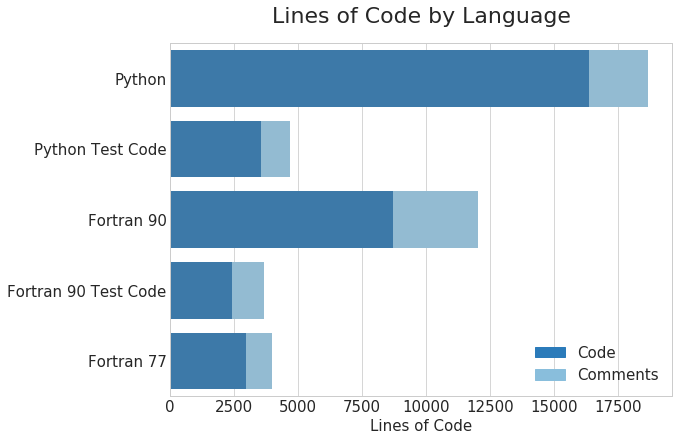

In [99]:
# load results
with open('cloc_code.yaml', 'r') as y:
    code = yaml.load(y)
    
with open('cloc_tests.yaml', 'r') as y:
    tests = yaml.load(y)

# store the relevant results in a DataFrame
code = pd.DataFrame.from_dict(code).T
code = code[['code', 'comment', 'blank']]
code = code.loc[['Python', 'Fortran 90', 'Fortran 77']]

tests = pd.DataFrame.from_dict(tests).T
tests = tests[['code', 'comment', 'blank']]
tests = tests.loc[['Python', 'Fortran 90']]
tests.rename(index={'Python': 'Python Test Code', 'Fortran 90': 'Fortran 90 Test Code'}, inplace=True)

# stack the datasets
plot_data = pd.concat([code, tests], axis=0)
plot_data = plot_data.loc[['Python', 'Python Test Code', 'Fortran 90', 'Fortran 90 Test Code', 'Fortran 77']]

# take the cumsum to make a stacked bar graph
plot_data = plot_data.cumsum(axis=1)
plot_data.reset_index(inplace=True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6.5))

# get the names of some colors
pal = sns.color_palette('Blues')
b1, b2, b3, b4, b5, b6 = pal.as_hex()

# Plot the bars, order is important!
sns.barplot(x='comment', y='index', data=plot_data, color=b3)
sns.barplot(x='code', y='index', data=plot_data, color=b5)

# Style the labels
ax.set_xlabel('Lines of Code', fontsize=15, weight=500)
ax.set_ylabel('')
ax.set_title('Lines of Code by Language', fontsize=22, weight=500, pad=20)
ax.tick_params(labelsize=15)

# make a legend
code_patch = mpatches.Patch(color=b5, label='Code')
comment_patch = mpatches.Patch(color=b3 , label='Comments')
plt.legend(handles=[code_patch, comment_patch], fontsize=15)

f.savefig('lines_of_code_by_language.png', bbox_inches='tight', dpi=200)